# Visualization
PySwarms implements tools for visualizing the behavior of your swarm. These are built on top of `matplotlib`, thus rendering charts that are easy to use and highly-customizable.

In this example, we will demonstrate three plotting methods available on PySwarms:
- `plot_cost_history`: for plotting the cost history of a swarm given a matrix
- `plot_contour`: for plotting swarm trajectories of a 2D-swarm in two-dimensional space
- `plot_surface`: for plotting swarm trajectories of a 2D-swarm in three-dimensional space

In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, HTML

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

The first step is to create an optimizer. Here, we're going to use Global-best PSO to find the minima of a sphere function. As usual, we simply create an instance of its class `pyswarms.single.GlobalBestPSO` by passing the required parameters that we will use. Then, we'll call the `optimize()` method for 100 iterations.

In [2]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=100)

2020-11-12 15:21:49,749 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.71e-9
2020-11-12 15:21:50,017 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.7120529441207856e-09, best pos: [ 5.27032253e-05 -3.05683330e-05]


## Plotting the cost history

To plot the cost history, we simply obtain the `cost_history` from the `optimizer` class and pass it to the `cost_history` function. Furthermore, this method also accepts a keyword argument `**kwargs` similar to `matplotlib`. This enables us to further customize various artists and elements in the plot. In addition, we can obtain the following histories from the same class:
- mean_neighbor_history: average local best history of all neighbors throughout optimization
- mean_pbest_history: average personal best of the particles throughout optimization

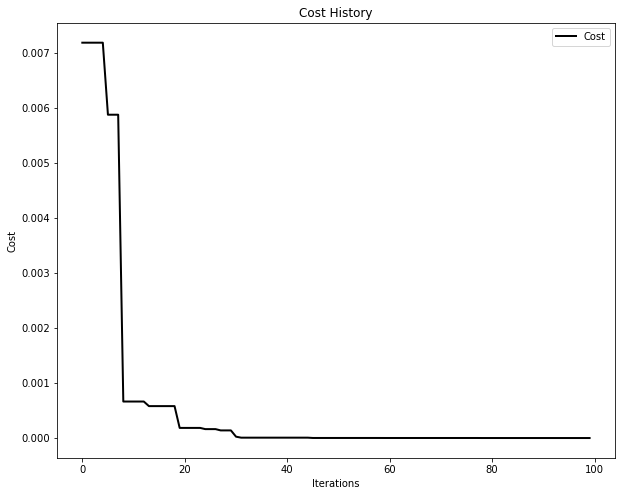

In [3]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

## Animating swarms
The `plotters` module offers two methods to perform animation, `plot_contour()` and `plot_surface()`. As its name suggests, these methods plot the particles in a 2-D or 3-D space.

Each animation method returns a `matplotlib.animation.Animation` class that still needs to be animated by a `Writer` class (thus necessitating the installation of a writer module). For the proceeding examples, we will convert the animations into a JS script. In such case, we need to invoke some extra methods to do just that.

Lastly, it would be nice to add meshes in our swarm to plot the sphere function. This enables us to visually recognize where the particles are with respect to our objective function. We can accomplish that using the `Mesher` class.

In [4]:
from pyswarms.utils.plotters.formatters import Mesher

In [5]:
# Initialize mesher with sphere function
m = Mesher(func=fx.sphere)

There are different formatters available in the `pyswarms.utils.plotters.formatters` module to customize your plots and visualizations. Aside from `Mesher`, there is a `Designer` class for customizing font sizes, figure sizes, etc. and an `Animator` class to set delays and repeats during animation.

### Plotting in 2-D space

We can obtain the swarm's position history using the `pos_history` attribute from the `optimizer` instance. To plot a 2D-contour, simply pass this together with the `Mesher` to the `plot_contour()` function. In addition, we can also mark the global minima of the sphere function, `(0,0)`, to visualize the swarm's "target".

In [6]:
%%capture
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

In [7]:
# Enables us to view it in a Jupyter notebook
animation.save('plot0.gif', writer='imagemagick', fps=10)
Image(url='plot0.gif')

2020-11-12 15:21:54,307 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2020-11-12 15:21:54,310 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Plotting in 3-D space

To plot in 3D space, we need a position-fitness matrix with shape `(iterations, n_particles, 3)`. The first two columns indicate the x-y position of the particles, while the third column is the fitness of that given position. You need to set this up on your own, but we have provided a helper function  to compute this automatically

In [8]:
# Obtain a position-fitness matrix using the Mesher.compute_history_3d()
# method. It requires a cost history obtainable from the optimizer class
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

In [9]:
# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

In [10]:
%%capture
# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima

In [11]:
animation3d.save('plot1.gif', writer='imagemagick', fps=10)
Image(url='plot1.gif')

2020-11-12 15:22:12,370 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2020-11-12 15:22:12,376 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


### Visualizing multi-dimenision problems

#### 2D contour

Higher dimensionional problems are hard to visualize in one plot, thus showing the interplay of the different dimensions in multiple plots is required. To plot a n-dimensional funtion, we need to add the optional paramters of the dimension index we want to have on x- and y-axis:

- x: the index of the dimension that should be plotted on x-axis (default: 0)
- y: the index of the dimension that should be plotted on y-axis (default: 1)
- best_pos: as it is not possible to plot the dynamics of all dimensions, the hidden function dimenions are assumed to be fixed at the best position obtian by the PSO, thus the final positions need to be handed over to the plot function.

In [12]:
# 3D probelm function
def f_3(x):
        n_particles = x.shape[0]
        j = []
        for i in range(n_particles):
            j.append((2 * x[i][0])**2 + (0.5 * x[i][1])**2 +  (x[i][2] - 0.5)**2)
        return np.array(j)

In [13]:
%%capture
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=3, options=options)
cost , pos = optimizer.optimize(f_3, iters=100)

m = Mesher(func=f_3, limits=[(-1,1), (-1,1), (-1,1)], levels=10, delta=0.01)
d = Designer(limits=[(-1,1), (-1,1), (-1,1)], label=['1st dimension (x)', '2nd dimension (y)', '3rd dimension (z)'])

# Plot interplay of dimenions in three plots
anim_0 = plot_contour(pos_history=optimizer.pos_history, mesher=m, designer=d, mark=(0,0), x=0, y=1, best_pos=pos)
anim_0.save('plot2_0.gif', writer='imagemagick', fps=10)
anim_1 = plot_contour(pos_history=optimizer.pos_history, mesher=m, designer=d, mark=(0,0.5), x=0, y=2, best_pos=pos)
anim_1.save('plot2_1.gif', writer='imagemagick', fps=10)
anim_2 = plot_contour(pos_history=optimizer.pos_history, mesher=m, designer=d, mark=(0,0.5), x=1, y=2, best_pos=pos)
anim_2.save('plot2_2.gif', writer='imagemagick', fps=10)

In [14]:
HTML('''<div style="display: flex; justify-content: row;">
    <img src="plot2_0.gif" style="height: 300px">
    <img src="plot2_1.gif" style="height: 300px">
    <img src="plot2_2.gif" style="height: 300px">
</div>''')

#### 3D surface
For plotting in 3D space, the additional fitness column needs to be added to get the position-fitness matrix with shape `(iterations, n_particles, n+1)`. The n columns indicate the position of the particles, while the last column (n+1) is the fitness of that given position. You can use the `compute_history_3d(optimizer.pos_history)` function within the `Mesher` to add the fitness column.

In [15]:
%%capture
m = Mesher(func=f_3, limits=[(-1,1), (-1,1), (-1,1)], levels=10, delta=0.01)
d = Designer(limits=[(-1,1), (-1,1), (-1,1), (-0.1,1)], label=['1st dimension (x)', '2nd dimension (y)', '3rd dimension (z)', 'fitness'])

# Compute fitness column
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

anim_0 = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(0,0, 0), x=0, y=1, best_pos=pos)
anim_0.save('plot3_0.gif', writer='imagemagick', fps=10)
anim_1 = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(0,0.5, 0), x=0, y=2, best_pos=pos)
anim_1.save('plot3_1.gif', writer='imagemagick', fps=10)
anim_2 = plot_surface(pos_history=pos_history_3d, mesher=m, designer=d, mark=(0,0.5, 0), x=1, y=2, best_pos=pos)
anim_2.save('plot3_2.gif', writer='imagemagick', fps=10)

In [16]:
HTML('''<div style="display: flex; justify-content: row;">
    <img src="plot3_0.gif" style="height: 300px">
    <img src="plot3_1.gif" style="height: 300px">
    <img src="plot3_2.gif" style="height: 300px">
</div>''')